In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv("D:\\machine learning\\Datasets\\Classified Data", index_col=[0])

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [5]:
#to perform knn algorithm then at first convert data to standerdScale
from sklearn.preprocessing import StandardScaler, SplineTransformer

In [6]:
#scaler= StandardScaler()

StandardScaler()


sklearn.preprocessing._data.StandardScaler

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [6]:
from sklearn.model_selection import train_test_split


In [13]:
X= df.drop(columns="TARGET CLASS", axis=1)

In [14]:
y= df["TARGET CLASS"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
predict= knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.92      0.94       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



Text(0.5, 1.0, 'Confusion Matrix')

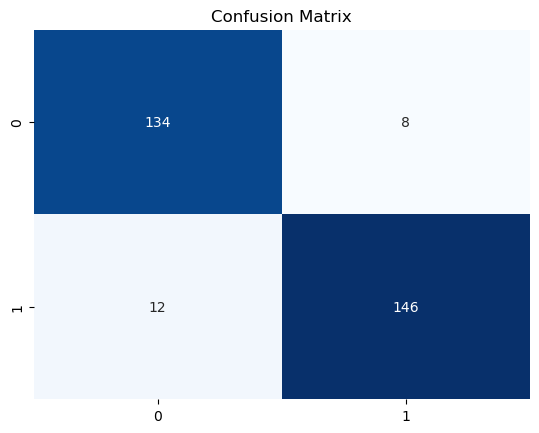

In [21]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")

In [22]:
error_rates = []

for k in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train) 
    pred_i= knn.predict(X_test)
    error_rates.append(np.mean(pred_i!=y_test))

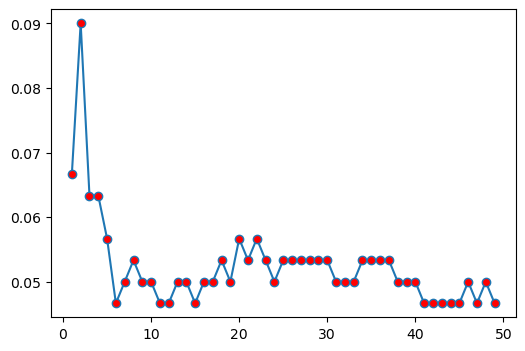

In [23]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 50), error_rates, marker="o", ms=6, mfc="red")

In [24]:
knn= KNeighborsClassifier(n_neighbors=44)
knn.fit(X_train, y_train)
predict= knn.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Text(0.5, 1.0, 'Confusion Matrix')

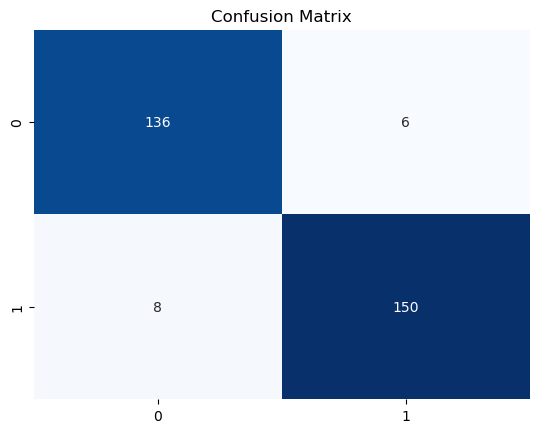

In [25]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")